In [36]:
# Ameya Nijasure
# AICTE ID : 1-2905050722
# Determine if a student belongs to boys' or girls' height distribution
# Q1 to  Q6 in this tab

import numpy as np              #import Libraries
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42) # Set seed for reproducibility

# genrating random data for 90 boys and 30 girls
b_h = np.random.normal(5.75, 0.32, 90)   # B: N(5.75, 0.32), n=90
g_h = np.random.normal(5.14, 0.252, 30)  # G: N(5.14, 0.252), n=30

#test sample height
test_height = 5.4  # Test height of unknown student

#Confidence Interval for boys' height distribution
confidence = 0.95
mean_b = np.mean(b_h)
std_b = np.std(b_h, ddof=1)
n_b = len(b_h)

margin_error = (stats.norm.ppf((1 + confidence) / 2)) * (std_b / np.sqrt(n_b))
ci_lower = mean_b - margin_error
ci_upper = mean_b + margin_error

print(f"95% Confidence Interval for boys' height: ({ci_lower:.3f}, {ci_upper:.3f})")

#Perform one-tailed Z-test
mu = 5.75     # Population mean for boys
sigma = 0.3   # Known population std dev
x_bar = test_height
z_score = (x_bar - mu) / sigma
p_value = stats.norm.cdf(z_score)  # Left-tailed test

alpha = 0.05

print(f"Z-score: {z_score:.3f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Conclusion: Reject H0 ➜ Student likely belongs to girls' distribution.")
else:
    print("Conclusion: Fail to reject H0 ➜ Student likely belongs to boys' distribution.")

# Error Analysis
# Type-I Error (alpha): Already defined
# Type-II Error (beta): Probability a girl is classified as boy

z_critical_val = stats.norm.ppf(alpha)  # Left-tailed Z-critical value
x_critical = mu + z_critical_val * sigma  # Corresponding height value

# Compute beta using girl's distribution: P(X > x_critical | Girl)
beta = 1 - stats.norm.cdf((x_critical - 5.14) / 0.252)

print(f"Type-I Error (α): {alpha}")
print(f"Type-II Error (β): {beta:.4f}")


95% Confidence Interval for boys' height: (5.657, 5.780)
Z-score: -1.167
P-value: 0.1217
Conclusion: Fail to reject H0 ➜ Student likely belongs to boys' distribution.
Type-I Error (α): 0.05
Type-II Error (β): 0.3219


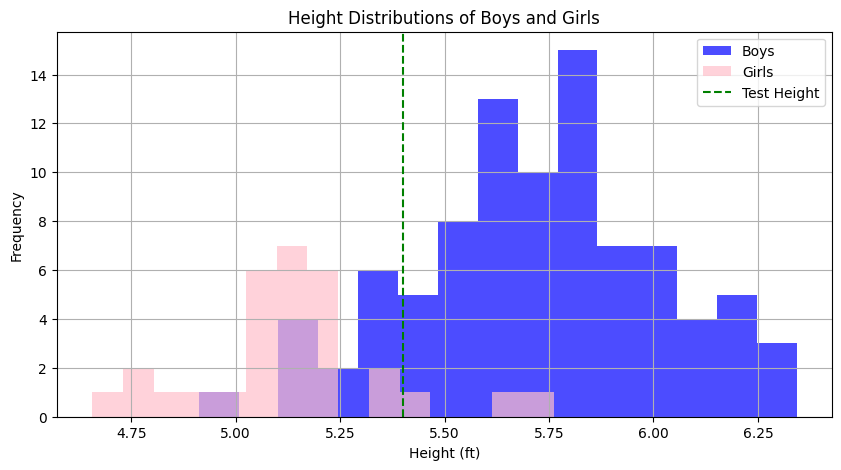

In [20]:
#Visualize for normal distributions - plot as optional to view normal distribution
plt.figure(figsize=(10, 5))
plt.hist(b_h, bins=15, alpha=0.7, label='Boys', color='blue')
plt.hist(g_h, bins=15, alpha=0.7, label='Girls', color='pink')
plt.axvline(test_height, color='green', linestyle='dashed', label='Test Height')
plt.title("Height Distributions of Boys and Girls")
plt.xlabel("Height (ft)") 
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

In [32]:
#Q7 create a fuction that will take n = 10/50/70 and then mean of that to test height

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def run_ztest(n):
    np.random.seed(37)
    boys_heights = np.random.normal(5.75, 0.32, 90)
    girls_heights = np.random.normal(5.14, 0.252, 30)
    
    combined_heights = np.concatenate([boys_heights, girls_heights]) #combile hights to one location
    
    sample = np.random.choice(combined_heights, size=n, replace=False) #randomly generate set of given number n
    test_height = np.mean(sample)

    print("\n==============================")
    print(f" Hypothesis Testing for n = {n} Test Samples")
    print("==============================")
    print(f"Random {n}-sample heights:\n{sample}")
    print(f"Mean of test sample (test_height): {test_height:.3f} ft")

    mean_boys = np.mean(boys_heights) #mean of boys
    std_boys = np.std(boys_heights, ddof=1)
    alpha = 0.05
    n_boys = len(boys_heights)
    z_critical = norm.ppf(1 - alpha/2)

    margin_error = z_critical * (std_boys / np.sqrt(n_boys)) #z-test for given data
    ci_lower = mean_boys - margin_error
    ci_upper = mean_boys + margin_error

    print("\n--- Confidence Interval ---")
    print(f"95% CI for boys' height: ({ci_lower:.3f}, {ci_upper:.3f})")

    mu = 5.75       # Boys' population mean
    sigma = 0.3     # Population std deviation (known)
    z_score = (test_height - mu) / sigma
    p_value = norm.cdf(z_score)  # left-tailed

    print("\n---Z-Test ---")
    print(f"Z-score: {z_score:.3f}")
    print(f"P-value (left-tailed): {p_value:.4f}")

    if p_value < alpha:
        print("Conclusion: Reject H0 ➜ Student likely belongs to girls' distribution.")
    else:
        print("Conclusion: Fail to reject H0 ➜ Student likely belongs to boys' distribution.")

    z_critical_left = norm.ppf(alpha) #error Analysis
    x_critical = mu + z_critical_left * sigma

    mean_girls = 5.14
    std_girls = 0.252
    beta = 1 - norm.cdf((x_critical - mean_girls) / std_girls)

    print("\n--- Error Analysis ---")
    print(f"Type-I Error (α): {alpha}")
    print(f"Type-II Error (β): {beta:.4f}")


In [33]:
# Run for n = 10
run_ztest(n=10)


 Hypothesis Testing for n = 10 Test Samples
Random 10-sample heights:
[5.59582101 5.1932545  5.81157635 5.7469062  5.71545779 5.20073496
 5.59310702 5.41082099 5.93205121 5.72972646]
Mean of test sample (test_height): 5.593 ft

--- Confidence Interval ---
95% CI for boys' height: (5.703, 5.839)

---Z-Test ---
Z-score: -0.524
P-value (left-tailed): 0.3003
Conclusion: Fail to reject H0 ➜ Student likely belongs to boys' distribution.

--- Error Analysis ---
Type-I Error (α): 0.05
Type-II Error (β): 0.3219


In [34]:
# Run for n = 50
run_ztest(n=50)


 Hypothesis Testing for n = 50 Test Samples
Random 50-sample heights:
[5.59582101 5.1932545  5.81157635 5.7469062  5.71545779 5.20073496
 5.59310702 5.41082099 5.93205121 5.72972646 5.86092705 5.62010234
 5.88617424 5.02945827 5.38707345 5.33388923 5.78266021 5.1340108
 5.03057626 6.23412857 5.92109026 5.90356828 5.13208883 5.60645141
 5.12748236 5.01080717 5.48517484 5.35473958 6.01133688 5.50335725
 5.46786397 5.9488961  5.24073437 5.6536441  5.73110814 5.31071799
 4.93246668 5.72465827 5.44730289 5.55941047 5.64546706 6.09158477
 5.40420738 5.33619272 5.31815238 5.54746973 5.79161774 5.87897034
 5.42523377 5.19346196]
Mean of test sample (test_height): 5.539 ft

--- Confidence Interval ---
95% CI for boys' height: (5.703, 5.839)

---Z-Test ---
Z-score: -0.704
P-value (left-tailed): 0.2406
Conclusion: Fail to reject H0 ➜ Student likely belongs to boys' distribution.

--- Error Analysis ---
Type-I Error (α): 0.05
Type-II Error (β): 0.3219


In [35]:
# Run for n = 70
run_ztest(n=10)


 Hypothesis Testing for n = 10 Test Samples
Random 10-sample heights:
[5.59582101 5.1932545  5.81157635 5.7469062  5.71545779 5.20073496
 5.59310702 5.41082099 5.93205121 5.72972646]
Mean of test sample (test_height): 5.593 ft

--- Confidence Interval ---
95% CI for boys' height: (5.703, 5.839)

---Z-Test ---
Z-score: -0.524
P-value (left-tailed): 0.3003
Conclusion: Fail to reject H0 ➜ Student likely belongs to boys' distribution.

--- Error Analysis ---
Type-I Error (α): 0.05
Type-II Error (β): 0.3219
